In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
files = pd.read_csv('cites.csv')
files.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


In [4]:
birds = files[files['Class'] == 'Aves']
birds.isnull().sum()
birds = birds.drop(columns = ['Origin','Importer reported quantity','Unit'])
birds.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Exporter reported quantity,Term,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,1.0,bodies,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,1.0,bodies,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,43.0,feathers,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,43.0,specimens,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,specimens,S,W


## General Analysis

### Trade by Year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


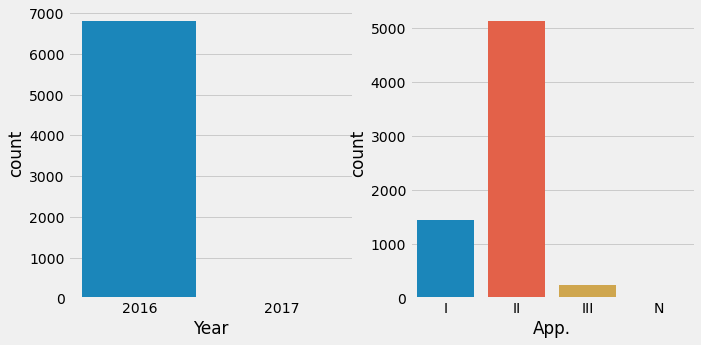

In [5]:
f, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(birds.Year,ax =ax[0])
sns.countplot(birds['App.'],ax = ax[1])
plt.show()

<AxesSubplot:title={'center':'Exporter'}>

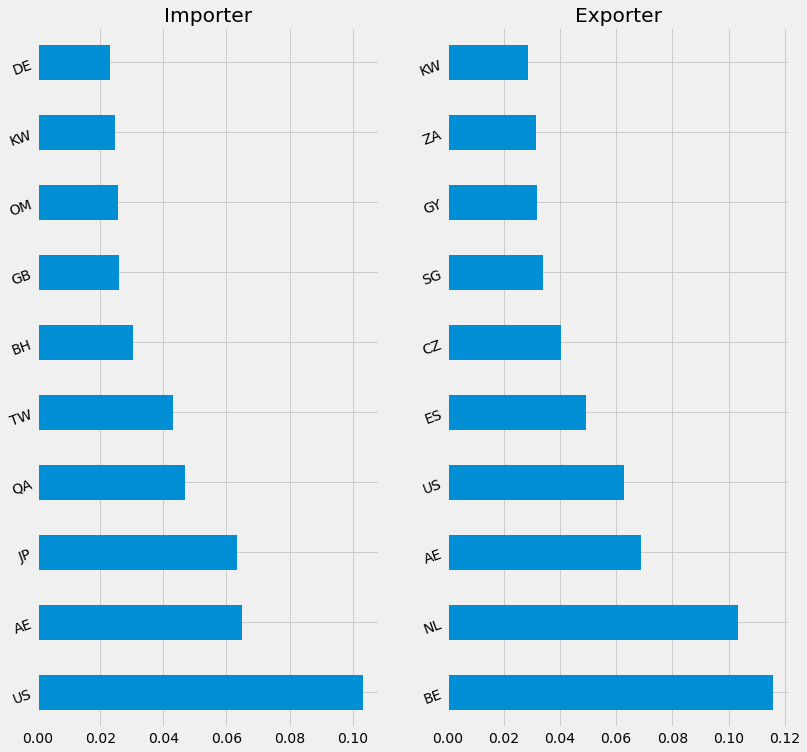

In [6]:
f,ax = plt.subplots(1,2,figsize = (12,12))
birds_import = birds.Importer.value_counts(normalize = True)
birds_import.head(10).plot(kind = 'barh',ax = ax[0],rot=20, title='Importer')
birds_export = birds.Exporter.value_counts(normalize = True)
birds_export.head(10).plot(kind = 'barh',ax = ax[1],rot = 20, title = 'Exporter')

<AxesSubplot:title={'center':'Source'}>

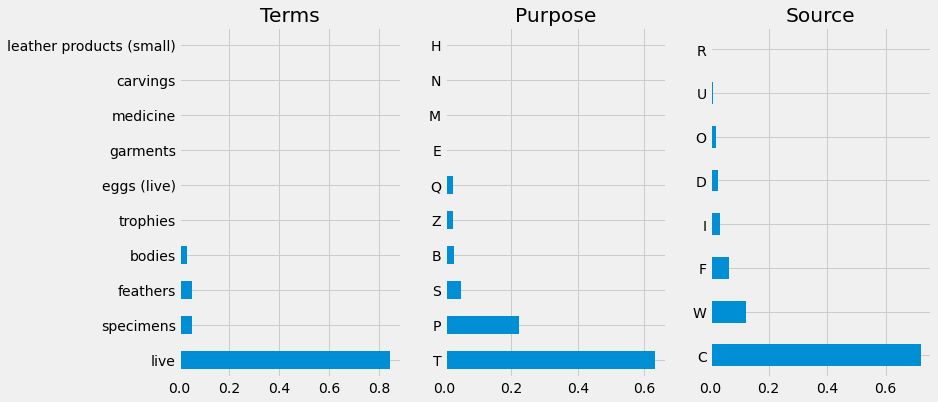

In [7]:
f,ax = plt.subplots(1,3,figsize = (12,6))
birds_term = birds.Term.value_counts(normalize = True)
birds_term.head(10).plot(kind = 'barh',ax = ax[0],title = 'Terms')
birds_purpose = birds.Purpose.value_counts(normalize = True)
birds_purpose.head(10).plot(kind = 'barh',ax = ax[1], title = 'Purpose')
birds_Source = birds.Source.value_counts(normalize = True)
birds_Source.head(10).plot(kind = 'barh',ax = ax[2], title = 'Source')

* We can see that the following are the three major importers -
* US - United States
* AE - United Arab Emirates
* JP - Japan
* We also observe that the following are the three major exporters-
* BE - Belgium
* NL - Netherlands
* AE - United Arab Emirates
* We can also interpret the from the above graphs that the major in -
* Terms - Live
* Purpose - T (Commercial)
* Source - C (Bred in captivity)
* We will do a detailed analysis later on.

### Analysis Based on Importer


### United States



<AxesSubplot:title={'center':'Family'}>

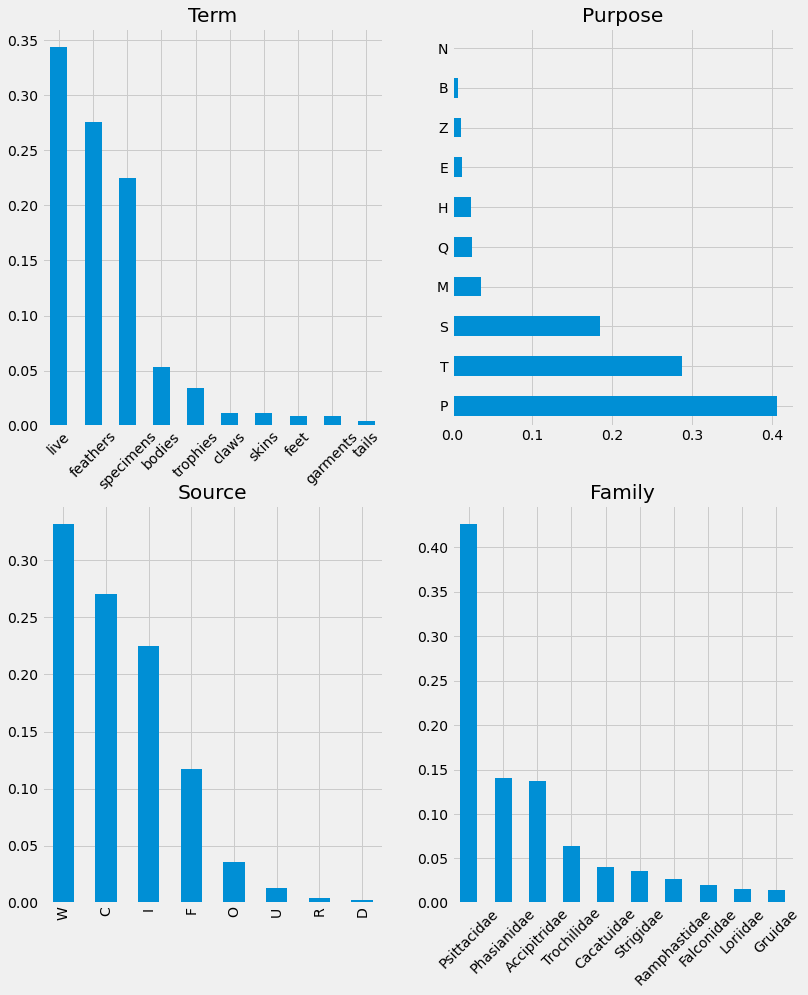

In [8]:
birds_us_imp = birds[birds['Importer'] == 'US']
f,ax =  plt.subplots(2,2,figsize = (12,15)) 
birds_us_imp['Term'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0,0],title = 'Term')
birds_us_imp['Purpose'].value_counts(normalize = True).head(10).plot(kind = 'barh',ax = ax[0,1],title = 'Purpose')
birds_us_imp['Source'].value_counts(normalize = True).head(10).plot(kind = 'bar',ax = ax[1,0],title = 'Source')
birds_us_imp['Family'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[1,1],title = 'Family')

* We can see that the most common term is Live
* We can also infer from the graph that the main purpose of the trade in US is Personal
* We came to know that the main source of import from the wild.
* The most common family is Psittacidae 
* Will do a detailed analysis on it.


### United Arab Emirates

<AxesSubplot:title={'center':'Family'}>

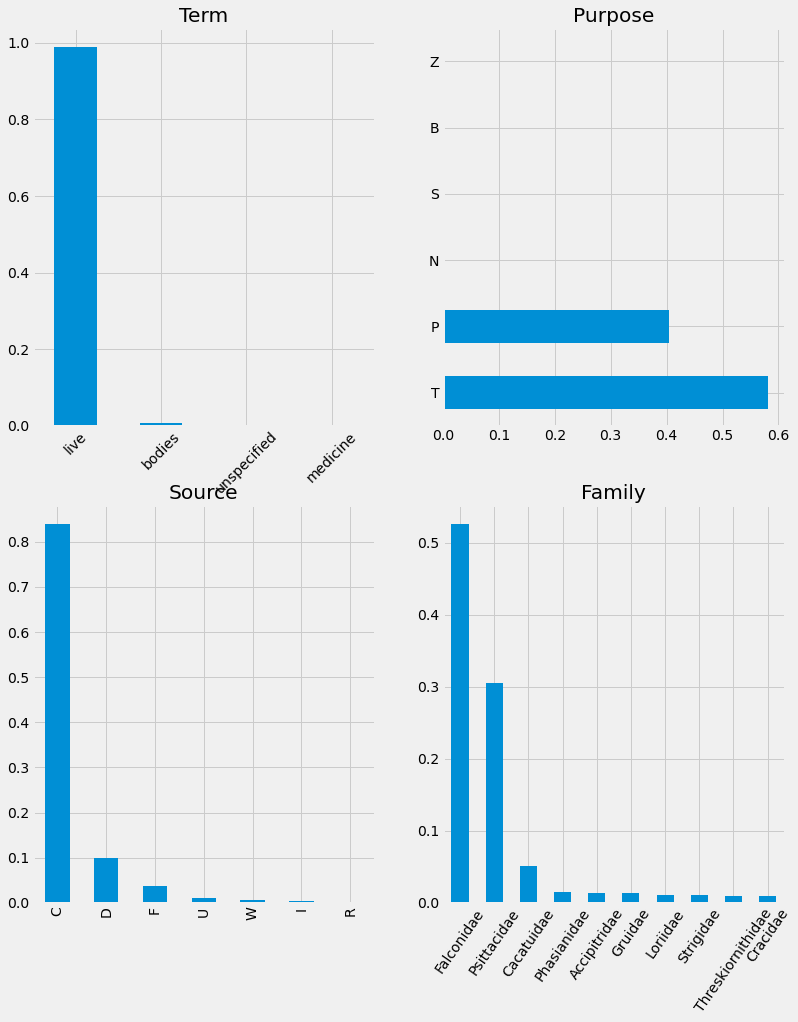

In [9]:
birds_ae_imp = birds[birds['Importer'] == 'AE']
f,ax =  plt.subplots(2,2,figsize = (12,15))
birds_ae_imp['Term'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0,0],title = 'Term')
birds_ae_imp['Purpose'].value_counts(normalize = True).head(10).plot(kind = 'barh',ax = ax[0,1],title = 'Purpose')
birds_ae_imp['Source'].value_counts(normalize = True).head(10).plot(kind = 'bar',ax = ax[1,0],title = 'Source')
birds_ae_imp['Family'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 55,ax = ax[1,1],title = 'Family')


* We can see that the most common term is Live
* We can also infer from the graph that the main purpose of the trade in AE is Commercial
* We came to know that the main source of import from the captivity.
* The most common family is Falconidae 
* Will do a detailed analysis on it.


### Japan

<AxesSubplot:title={'center':'Family'}>

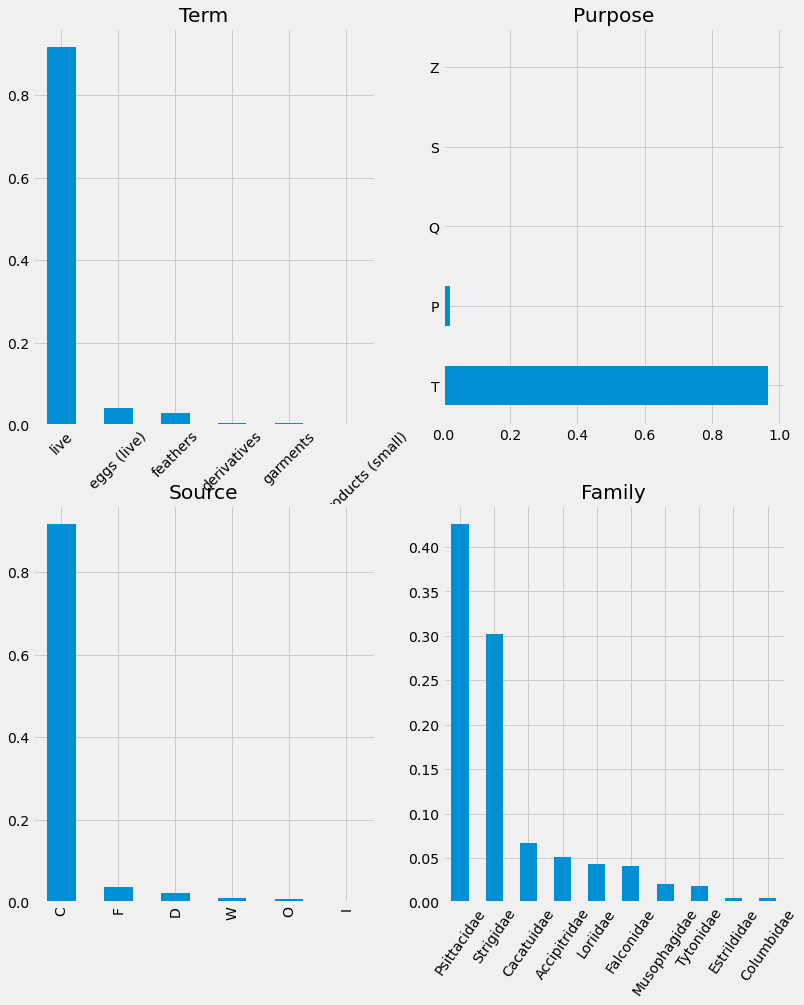

In [10]:
birds_jp_imp = birds[birds['Importer'] == 'JP']
f,ax =  plt.subplots(2,2,figsize = (12,15))
birds_jp_imp['Term'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0,0],title = 'Term')
birds_jp_imp['Purpose'].value_counts(normalize = True).head(10).plot(kind = 'barh',ax = ax[0,1],title = 'Purpose')
birds_jp_imp['Source'].value_counts(normalize = True).head(10).plot(kind = 'bar',ax = ax[1,0],title = 'Source')
birds_jp_imp['Family'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 55,ax = ax[1,1],title = 'Family')


* We can see that the most common term is Live
* We can also infer from the graph that the main purpose of the trade in US is Commercial
* We came to know that the main source of import from captivity.
* The most common family is Psittacidae 
* Will do a detailed analysis on it.

<AxesSubplot:title={'center':'JP Genus'}>

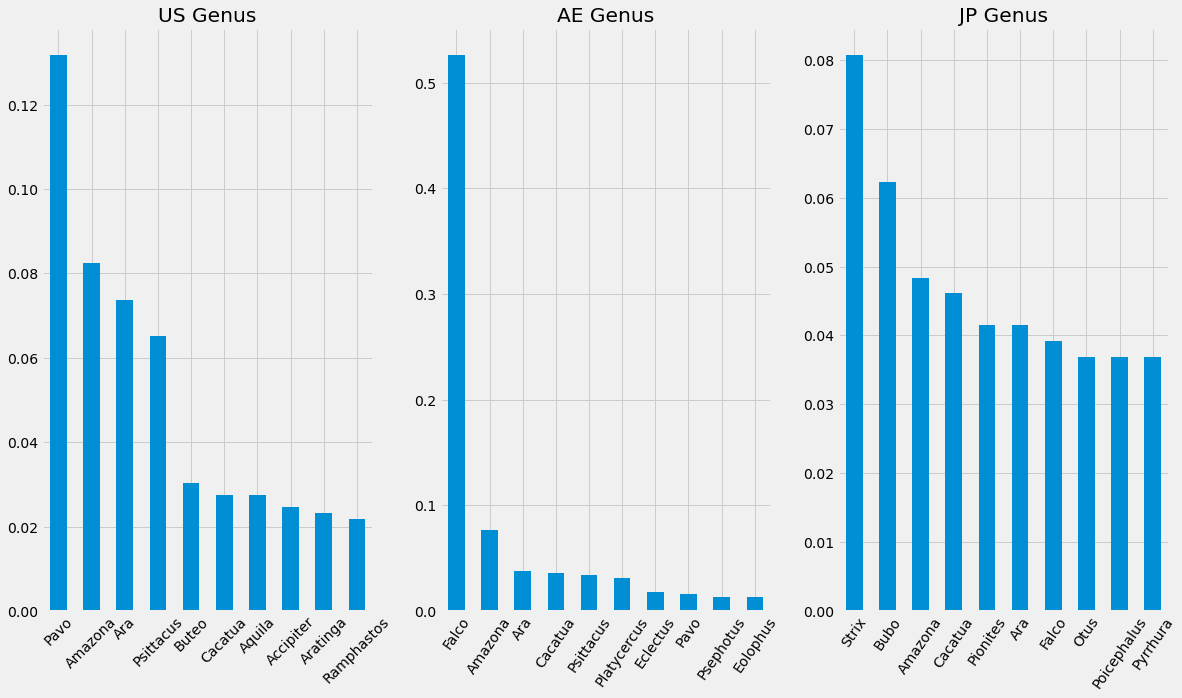

In [11]:
f,ax =  plt.subplots(1,3,figsize = (18,10))
birds_us_imp['Genus'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0],title = 'US Genus')
birds_ae_imp['Genus'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 55,ax = ax[1],title = 'AE Genus')
birds_jp_imp['Genus'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 55,ax = ax[2],title = 'JP Genus')

### Analysis Based on Exporters
* BL - Belgium
* NL - Netherlands
* AE - United Arab Emirates

### Belgium

<AxesSubplot:title={'center':'Family'}>

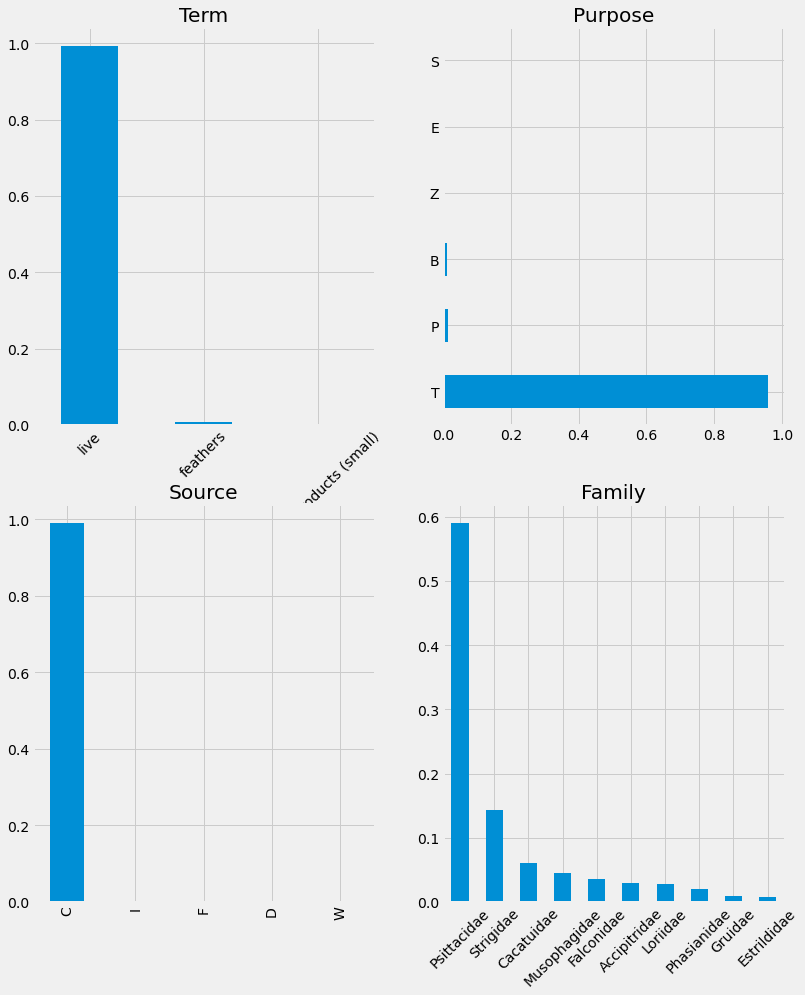

In [12]:
birds_be_exp = birds[birds['Exporter'] == 'BE']
f,ax =  plt.subplots(2,2,figsize = (12,15))
birds_be_exp['Term'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0,0],title = 'Term')
birds_be_exp['Purpose'].value_counts(normalize = True).head(10).plot(kind = 'barh',ax = ax[0,1],title = 'Purpose')
birds_be_exp['Source'].value_counts(normalize = True).head(10).plot(kind = 'bar',ax = ax[1,0],title = 'Source')
birds_be_exp['Family'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[1,1],title = 'Family')

<AxesSubplot:title={'center':'Family'}>

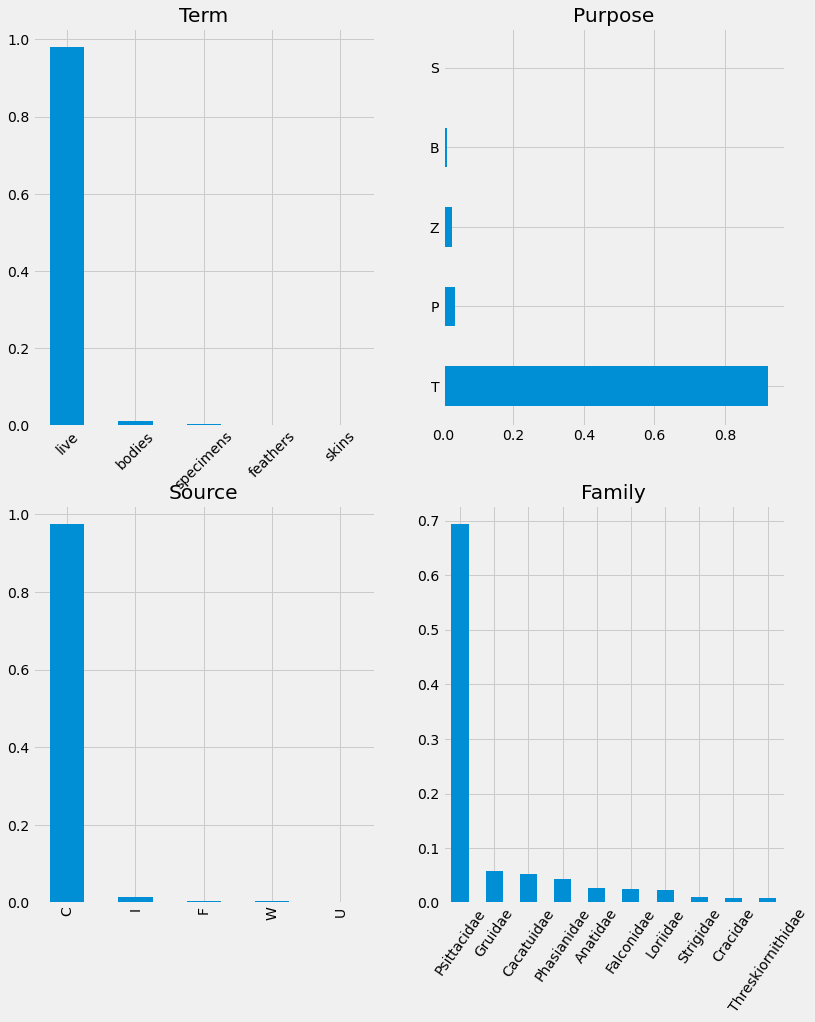

In [13]:
birds_nl_exp = birds[birds['Exporter'] == 'NL']
f,ax =  plt.subplots(2,2,figsize = (12,15))
birds_nl_exp['Term'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0,0],title = 'Term')
birds_nl_exp['Purpose'].value_counts(normalize = True).head(10).plot(kind = 'barh',ax = ax[0,1],title = 'Purpose')
birds_nl_exp['Source'].value_counts(normalize = True).head(10).plot(kind = 'bar',ax = ax[1,0],title = 'Source')
birds_nl_exp['Family'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 55,ax = ax[1,1],title = 'Family')

<AxesSubplot:title={'center':'Family'}>

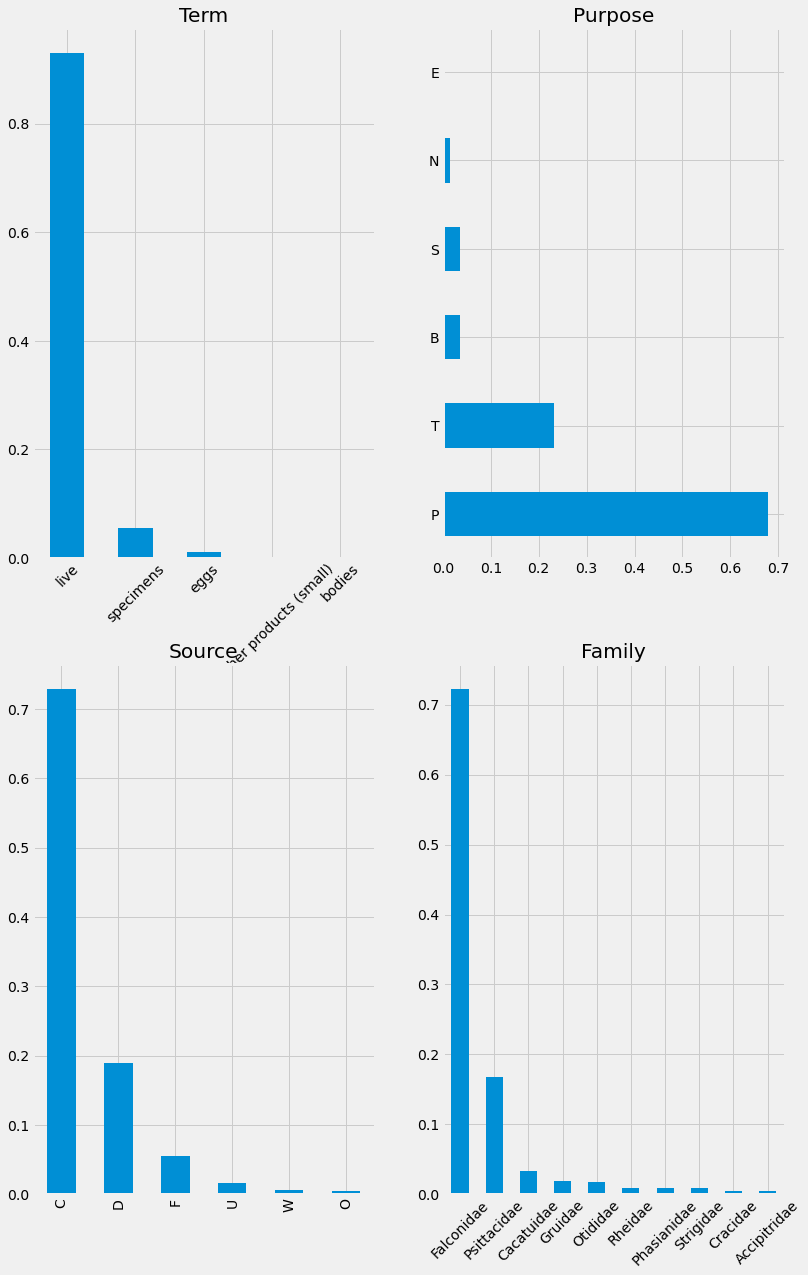

In [14]:
birds_ae_exp = birds[birds['Exporter'] == 'AE']
f,ax =  plt.subplots(2,2,figsize = (12,20))
birds_ae_exp['Term'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0,0],title = 'Term')
birds_ae_exp['Purpose'].value_counts(normalize = True).head(10).plot(kind = 'barh',ax = ax[0,1],title = 'Purpose')
birds_ae_exp['Source'].value_counts(normalize = True).head(10).plot(kind = 'bar',ax = ax[1,0],title = 'Source')
birds_ae_exp['Family'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[1,1],title = 'Family')

<AxesSubplot:title={'center':'AE Genus'}>

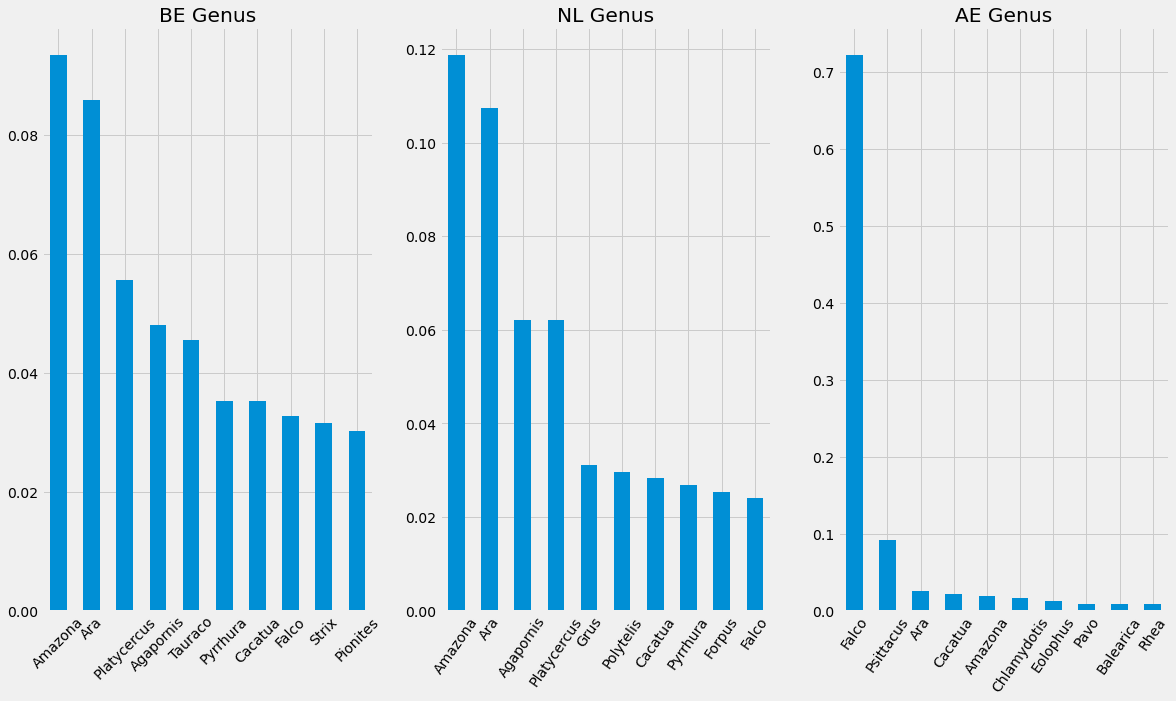

In [15]:
f,ax =  plt.subplots(1,3,figsize = (18,10))
birds_be_exp['Genus'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 45,ax = ax[0],title = 'BE Genus')
birds_nl_exp['Genus'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 55,ax = ax[1],title = 'NL Genus')
birds_ae_exp['Genus'].value_counts(normalize = True).head(10).plot(kind = 'bar',rot = 55,ax = ax[2],title = 'AE Genus')

### Trade Based on Exported Reported Quantity

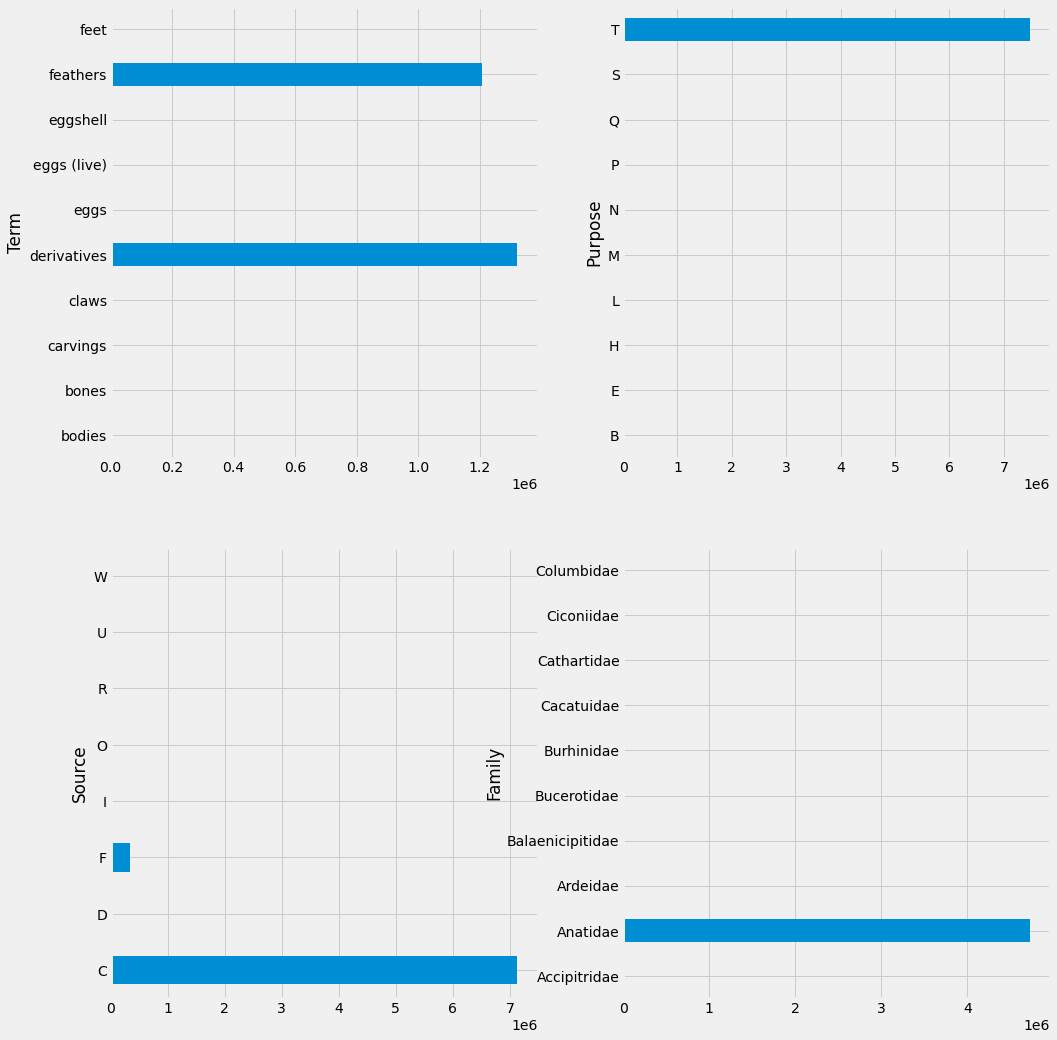

In [16]:
fig,ax = plt.subplots(2,2,figsize = (15,17))
birds_term = birds.groupby('Term')['Exporter reported quantity'].sum().head(10).plot(kind = 'barh',ax = ax[0,0])
birds_purpose = birds.groupby('Purpose')['Exporter reported quantity'].sum().head(10).plot(kind = 'barh',ax = ax[0,1])
birds_source = birds.groupby('Source')['Exporter reported quantity'].sum().head(10).plot(kind = 'barh',ax = ax[1,0])
birds_family = birds.groupby('Family')['Exporter reported quantity'].sum().head(10).plot(kind = 'barh',ax = ax[1,1])

### Trade Based on Family

The top 10 family contribute to : 92.27962638645651 %


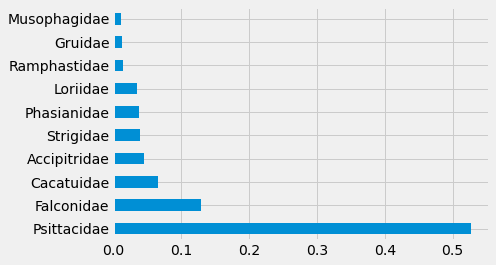

In [17]:
birds_family = birds['Family'].value_counts(normalize = True)
birds_family.head(10).plot(kind = 'barh')
print('The top 10 family contribute to :',(birds_family.head(10).sum())*100,'%')

### Trade Based On Genus

The top 10 genus contribute to : 53.27184892402285 %


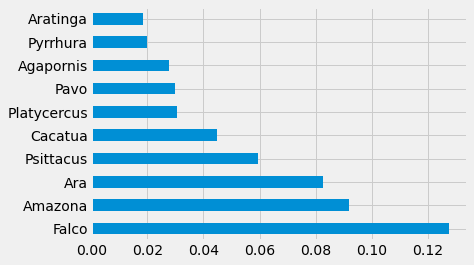

In [22]:
birds_genus = birds['Genus'].value_counts(normalize = True)
birds_genus.head(10).plot(kind = 'barh')
print('The top 10 genus contribute to :',(birds_genus.head(10).sum())*100,'%')

### Trade Based On Taxon

<AxesSubplot:>

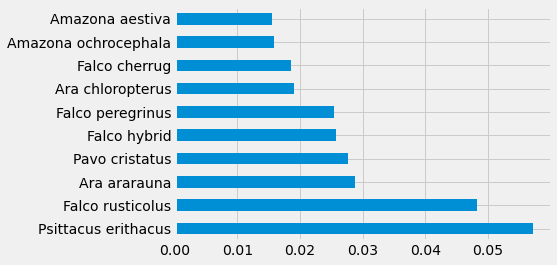

In [27]:
birds_taxon = birds['Taxon'].value_counts(normalize = True)
birds_taxon.head(10).plot(kind = 'barh')